To support non-linear decision boundaries, SMVs use functions to transform the original feature space into a new space can represent those non-linear relationships.

For instance, say you augment the original feature space with the square its features. In this case, you applied a quadratic function to the original feature set to create the square of those features. Now you have your original feature and their quadratic version, in this augmented space. And so, implicitly, there’s a function that maps these two feature spaces.

If you try to draw the decision boundary in the original feature space it has a quadratic shape. But if you train your model in the augmented feature space, you’ll find a linear decision boundary that separates the two classes. Because it is a transformation, the quadratic boundary in original feature space corresponds to a linear one in the augmented feature space.

The functions that define these transformations are called kernels. They work as similarity functions between observations in the training and testing sets.

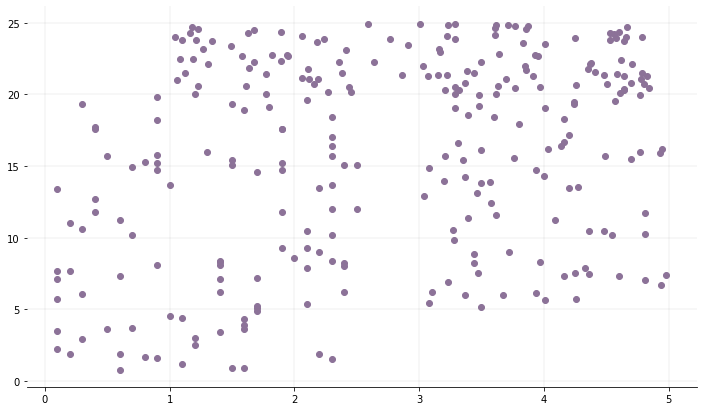

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

# Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

Whenever you have a model that is represented with inner products, you can plug in a kernel function. For instance, a linear kernel is the same as applying linear transformations to feature space. And, in this case, it’s the same as a support vector classifier, because the decision boundary is linear.

With polynomial kernels, you’re projecting the original feature space into a polynomial feature space. So the decision boundary that separates the classes is defined with a higher order polynomial.

The use of kernels is what distinguishes support vector classifiers from support vector machines. And they open up the possibility to tackle more complex problems. But augmenting the feature space could mean extra computational needs. Because, with a big enough feature space, it can be expensive to fit a model, both in terms of both time and resources.

Despite the the augmented feature space, kernels bring a significant advantage. SVMs don’t actually compute the transformation of each observation into the augmented space. They use a trick and instead compute the inner product of observations in the augmented space which, computationally, is much cheaper. This is called the kernel trick.

In the end, SVMs make two important assumptions:

Data is linearly separable. Even if the linear boundary is in an augmented feature space.
The model is represented using inner products, so that kernels can be used.

In [2]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

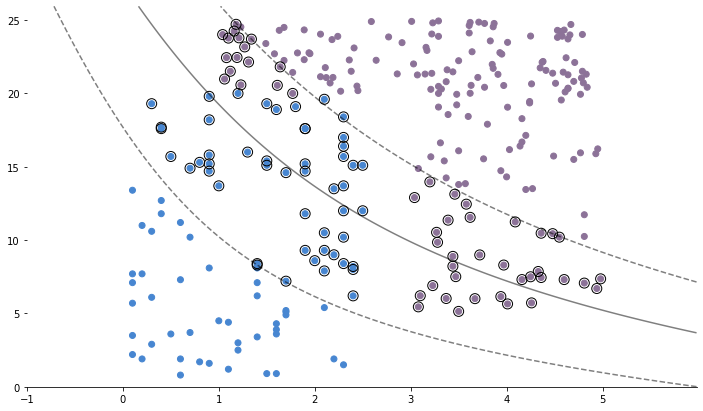

In [3]:
fig, ax = plt.subplots(figsize=(12, 7))
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()